In [115]:
#데이터 준비
import numpy as np
import pandas as pd
population = pd.read_csv('/content/data__1.csv', encoding='euc-kr')
population.head()

,항목,출생아수(명),사망자수(명),혼인건수(건),합계출산율
0,2018,326822,298820,257622,0.98
1,2019,302676,295110,239159,0.92
2,2020,272337,304948,213502,0.84
3,2021,260562,317680,192507,0.81
4,2022,249186,372939,191690,0.78


In [130]:
# 첫 번째 열에서 연도 추출
def extract_year_from_first_col(value):
    if isinstance(value, (int, float)):
        return int(value)
    if isinstance(value, str):
        match = re.match(r'^(\d{4})', value)
        if match:
            return int(match.group(1))
    return None

# '연도' 컬럼 생성
population['연도'] = population.iloc[:, 0].apply(extract_year_from_first_col)

# 연도 컬럼을 첫 번째 컬럼으로 재배치
cols = ['연도'] + [col for col in population.columns if col != '연도']
population_with_year = population[cols].copy()

display(population_with_year.head())
display(population_with_year.tail())

,연도,항목,출생아수(명),사망자수(명),혼인건수(건),합계출산율
0,2018,2018,326822,298820,257622,0.98
1,2019,2019,302676,295110,239159,0.92
2,2020,2020,272337,304948,213502,0.84
3,2021,2021,260562,317680,192507,0.81
4,2022,2022,249186,372939,191690,0.78


,연도,항목,출생아수(명),사망자수(명),혼인건수(건),합계출산율
2,2020,2020,272337,304948,213502,0.84
3,2021,2021,260562,317680,192507,0.81
4,2022,2022,249186,372939,191690,0.78
5,2023,2023,230028,352511,193657,0.72
6,2024,2024,238300,358400,222412,0.75


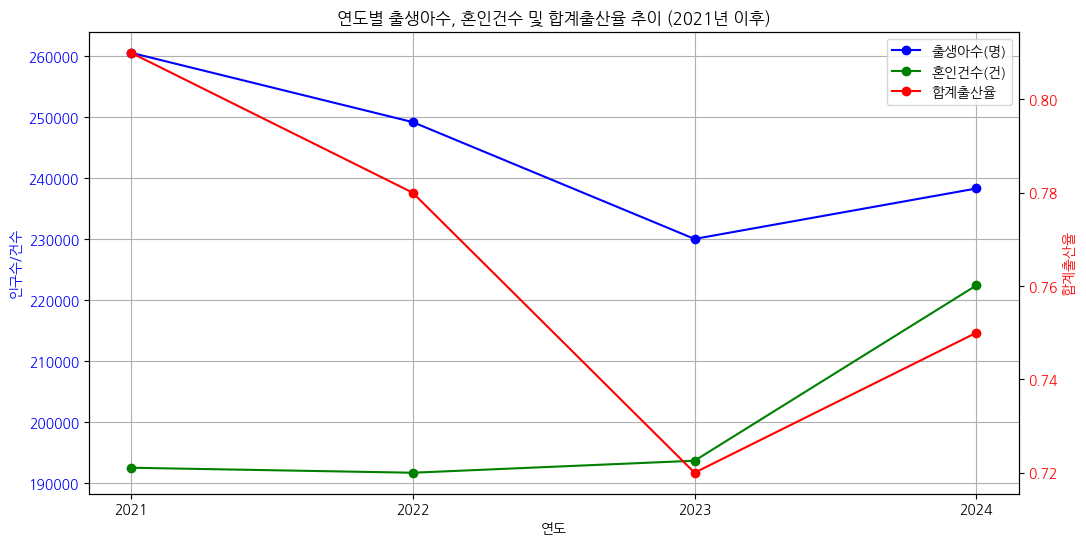

In [131]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시각화 설정 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2021년 이후 데이터만 필터링
population_2021_onwards = population_with_year[population_with_year['연도'] >= 2021].copy()


# 꺾은선 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 출생아수와 혼인건수 그래프 (기본 y축)
ax1.plot(population_2021_onwards['연도'], population_2021_onwards['출생아수(명)'], marker='o', label='출생아수(명)', color='blue')
ax1.plot(population_2021_onwards['연도'], population_2021_onwards['혼인건수(건)'], marker='o', label='혼인건수(건)', color='green')

# 기본 y축 라벨 설정
ax1.set_xlabel('연도')
ax1.set_ylabel('인구수/건수', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# 합계출산율 그래프 (보조 y축)
ax2 = ax1.twinx()
ax2.plot(population_2021_onwards['연도'], population_2021_onwards['합계출산율'], marker='o', label='합계출산율', color='red')

# 보조 y축 라벨 설정
ax2.set_ylabel('합계출산율', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 설정
plt.title('연도별 출생아수, 혼인건수 및 합계출산율 추이 (2021년 이후)')

# x축 눈금을 연도 데이터에 맞게 설정
ax1.set_xticks(population_2021_onwards['연도'])

# 범례 합치기
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# 그래프 표시
plt.show()

In [118]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,115 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and dire

In [119]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 나눔 폰트 경로 확인
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔고딕 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("나눔고딕 폰트가 설정되었습니다.")

나눔고딕 폰트가 설정되었습니다.


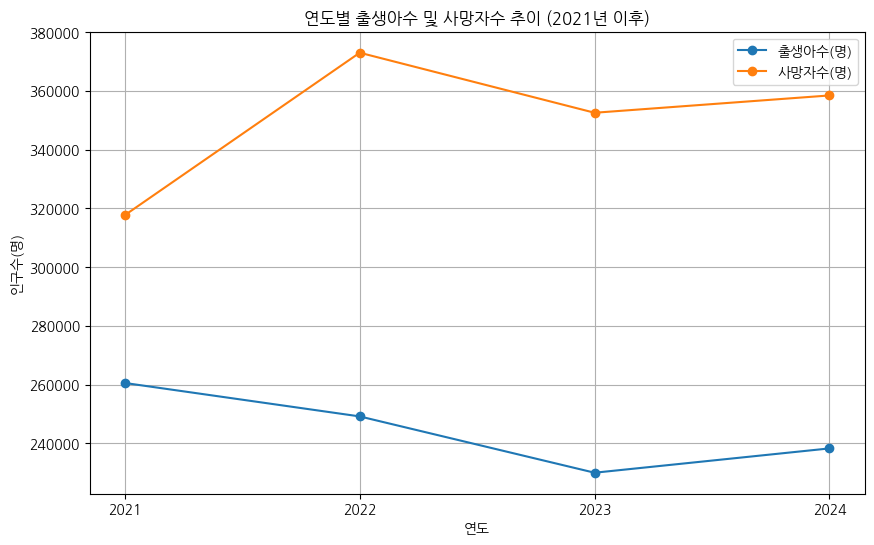

In [132]:
import matplotlib.pyplot as plt

# 시각화 설정 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2021년 이후 데이터만 필터링
population_2021_onwards = population_with_year[population_with_year['연도'] >= 2021].copy()


# 꺾은선 그래프 생성
plt.figure(figsize=(10, 6))

# 출생아수 그래프
plt.plot(population_2021_onwards['연도'], population_2021_onwards['출생아수(명)'], marker='o', label='출생아수(명)')

# 사망자수 그래프
plt.plot(population_2021_onwards['연도'], population_2021_onwards['사망자수(명)'], marker='o', label='사망자수(명)')

# 그래프 제목 및 축 라벨 설정
plt.title('연도별 출생아수 및 사망자수 추이 (2021년 이후)')
plt.xlabel('연도')
plt.ylabel('인구수(명)')
plt.grid(True)
plt.legend()

# x축 눈금을 연도 데이터에 맞게 설정
plt.xticks(population_2021_onwards['연도'])

# 그래프 표시
plt.show()

2022년 사망자수 급격한 증가




2024년 출생자수 증가


*   코로나19 엔데믹
*   정부의 출산율 제고 노력의 성과

주거 지원 정책 강화-신혼·출산 가구를 위한 주택 공급 확대, 출산 가구 특공 기회 확대

양육 비용 부담 완화 노력-자녀장려금 확대, 육아휴직 확대 및 제도 개선








In [ ]:
**전국 단위 연도별 출생자수와 사망자수의 추이**

![image.png](attachment:db5542ba-095d-464d-891a-3375c98e4a88:image.png)

2022년 사망자수 증가

*   코로나19 사망자 급증: 2022년은 코로나19의 주요 확산 시기로, 특히 오미크론 변이 바이러스가 빠르게 확산하면서 확진자 수와 함께 코로나19로 인한 사망자 수도 급격히 증가
*   고령화 심화: 고령화로 인해 전체 인구 중 사망 위험이 높은 고령층 비율이 커지면서 자연적인 사망자 수 역시 해마다 증가하는 추세

![image.png](attachment:9265764f-3365-47bb-8599-821c74cc8b25:image.png)

2024년 출생자수 급격한 증가

*   코로나19 엔데믹: 2023년을 기점으로 코로나19가 **엔데믹 단계**로 접어들면서 사회적 거리두기, 이동 제한, 의료 접근성 문제 등이 해소되었고, 결혼과 출산을 미뤘던 많은 가구가 본격적으로 출산을 선택하기 시작
*   정부의 출산율 제고 노력의 성과: 지속적인 초저출산 문제를 해결하기 위해 정부는 지난 수년간 **출산율 제고를 위한 다양한 정책**을 추진. 이러한 제도적 노력들이 2024년부터 본격적으로 효과를 내기 시작하면서, 결혼과 출산을 긍정적으로 고려하는 부부가 증가한 것으로 평가됨.

In [127]:
# 2025년 데이터 추가
new_data_2025 = {'연도': 2025,
                 '항목': 2025, # '항목' 컬럼도 연도와 동일하게 설정
                 '출생아수(명)': 21435,
                 '사망자수(명)': 32420.5,
                 '혼인건수(건)': 19406.25,
                 '합계출산율': 0.815}

# 새로운 데이터를 데이터프레임으로 변환
new_row_2025 = pd.DataFrame([new_data_2025])

# 기존 데이터프레임에 2025년 데이터 추가
# ignore_index=True를 사용하여 인덱스를 재설정
population_with_year = pd.concat([population_with_year, new_row_2025], ignore_index=True)

display(population_with_year.tail())

,연도,항목,출생아수(명),사망자수(명),혼인건수(건),합계출산율
3,2021,2021,260562,317680.0,192507.00,0.810
4,2022,2022,249186,372939.0,191690.00,0.780
5,2023,2023,230028,352511.0,193657.00,0.720
6,2024,2024,238300,358400.0,222412.00,0.750
7,2025,2025,21435,32420.5,19406.25,0.815


In [133]:
# data2 파일 읽어오기
import pandas as pd

try:
    data2 = pd.read_csv('/content/data2.csv', encoding='euc-kr')
    display(data2.head())
except FileNotFoundError:
    print("Error: 'data2.csv' not found. Please make sure the file is uploaded to '/content/data2.csv'")
except UnicodeDecodeError:
    print("Error: Could not decode the file using 'euc-kr' encoding. Please check the file encoding or try another encoding like 'cp949'.")
except Exception as e:
    print(f"An error occurred: {e}")

,시점,2021.01,2021.01.1,2021.01.2,2021.01.3,2021.01.4,2021.01.5,2021.01.6,2021.01.7,2021.01.8,...,2025.03 p).1,2025.03 p).2,2025.03 p).3,2025.03 p).4,2025.03 p).5,2025.03 p).6,2025.03 p).7,2025.03 p).8,2025.03 p).9,2025.03 p).10
0,행정구역별,출생아수(명),조출생률(천명당),사망자수(명),조사망률(천명당),자연증가건수(명),자연증가율(천명당),혼인건수(건),조혼인율(천명당),이혼건수(건),...,조출생률(천명당),사망자수(명),조사망률(천명당),자연증가건수(명),자연증가율(천명당),혼인건수(건),조혼인율(천명당),이혼건수(건),조이혼율(천명당),합계출산율
1,전국,24894,5.7,27223,6.2,-2329,-0.5,16280,3.7,8371,...,4.9,31141,7.2,-10100,-2.3,19181,4.4,7210,1.7,0.77
2,서울특별시,4395,5.4,4095,5.1,300,0.4,3167,3.9,1271,...,4.8,4489,5.7,-703,-0.9,3814,4.8,911,1.2,-
3,부산광역시,1351,4.7,2094,7.3,-743,-2.6,987,3.5,505,...,4.2,2361,8.6,-1210,-4.4,1053,3.8,416,1.5,-
4,대구광역시,1001,4.9,1289,6.3,-288,-1.4,673,3.3,335,...,4.5,1492,7.5,-585,-2.9,763,3.8,315,1.6,-


# Task
모델링을 진행해줘. "data2.csv" 파일을 사용하고, 전국 출생아수 데이터를 활용하여 시계열 모델을 만들고 예측 결과를 시각화해줘.

## 데이터 클리닝 및 전처리

### Subtask:
데이터프레임의 불필요한 행을 제거하고, 컬럼 이름을 정리하며, 데이터를 시계열 분석에 적합한 'long' 형태로 변환합니다. 시간 정보를 올바르게 추출하고 데이터 타입을 변환합니다.


**Reasoning**:
Set the first row as the header, remove the original first row, rename the first column to '행정구역별', filter out rows where the first column is an integer, and reset the index. These steps prepare the data for transposition and subsequent time series analysis.



In [134]:
# 1. 데이터프레임 data2에서 첫 번째 행을 새로운 컬럼 이름으로 설정하고, 불필요한 첫 번째 행을 제거합니다.
data2.columns = data2.iloc[0]
data2 = data2[1:].copy()

# 2. 첫 번째 열의 이름을 '행정구역별'로 변경합니다.
data2 = data2.rename(columns={data2.columns[0]: '행정구역별'})

# 3. 첫 번째 열의 값이 정수인 행만 필터링하여 제거합니다.
# 첫 번째 열의 값들이 숫자인지 확인
is_integer = data2['행정구역별'].apply(lambda x: isinstance(x, (int, float)) and not pd.isna(x))

# 정수인 행 필터링하여 제거
population_cleaned = data2[~is_integer].copy()

# 4. 데이터프레임의 인덱스를 재설정합니다.
population_cleaned_reset = population_cleaned.reset_index(drop=True)

display(population_cleaned_reset.head())

,행정구역별,출생아수(명),조출생률(천명당),사망자수(명),조사망률(천명당),자연증가건수(명),자연증가율(천명당),혼인건수(건),조혼인율(천명당),이혼건수(건),...,조출생률(천명당),사망자수(명),조사망률(천명당),자연증가건수(명),자연증가율(천명당),혼인건수(건),조혼인율(천명당),이혼건수(건),조이혼율(천명당),합계출산율
0,전국,24894,5.7,27223,6.2,-2329,-0.5,16280,3.7,8371,...,4.9,31141,7.2,-10100,-2.3,19181,4.4,7210,1.7,0.77
1,서울특별시,4395,5.4,4095,5.1,300,0.4,3167,3.9,1271,...,4.8,4489,5.7,-703,-0.9,3814,4.8,911,1.2,-
2,부산광역시,1351,4.7,2094,7.3,-743,-2.6,987,3.5,505,...,4.2,2361,8.6,-1210,-4.4,1053,3.8,416,1.5,-
3,대구광역시,1001,4.9,1289,6.3,-288,-1.4,673,3.3,335,...,4.5,1492,7.5,-585,-2.9,763,3.8,315,1.6,-
4,인천광역시,1470,5.9,1419,5.7,51,0.2,964,3.9,614,...,5.4,1582,6.2,-207,-0.8,1107,4.3,494,1.9,-


**Reasoning**:
Set '행정구역별' as the index, transpose the DataFrame, set the first row as the new header, remove the original first row, and convert the index to datetime objects. This transforms the data into a format suitable for time series analysis with dates as the index and '행정구역별' as columns.



In [135]:
# 5. '행정구역별' 컬럼을 인덱스로 설정합니다.
population_indexed = population_cleaned_reset.set_index('행정구역별')

# 6. 데이터프레임을 전치(transpose)합니다.
population_transposed = population_indexed.T

# 7. 전치된 데이터프레임의 첫 번째 행을 새로운 컬럼 이름으로 설정하고, 불필요한 첫 번째 행을 제거합니다.
population_transposed.columns = population_transposed.iloc[0]
population_transposed = population_transposed[1:].copy()

# 8. 인덱스를 datetime 형식으로 변환합니다.
# 전치된 데이터프레임의 인덱스는 원래 컬럼 이름이므로 'YYYY.MM' 형식을 가집니다.
# 'YYYY.MM' 형식을 'YYYY-MM-DD' 형식으로 변환하여 datetime으로 파싱
population_transposed.index = pd.to_datetime(population_transposed.index, format='%Y.%m', errors='coerce')

display(population_transposed.head())

출생아수(명),24894,4395,1351,1001,1470,734,670,570,342,7209,736,771,1032,737,884,1126,1509,357
0,,,,,,,,,,,,,,,,,,
NaT,5.7,5.4,4.7,4.9,5.9,6,5.4,5.9,11.3,6.4,5.7,5.7,5.8,4.8,5.7,5.1,5.4,6.3
NaT,27223,4095,2094,1289,1419,674,643,492,105,5774,1071,1018,1430,1314,1564,1867,2037,337
NaT,6.2,5.1,7.3,6.3,5.7,5.5,5.2,5.1,3.5,5.1,8.2,7.5,8,8.6,10,8.4,7.2,5.9
NaT,-2329,300,-743,-288,51,60,27,78,237,1435,-335,-247,-398,-577,-680,-741,-528,20
NaT,-0.5,0.4,-2.6,-1.4,0.2,0.5,0.2,0.8,7.8,1.3,-2.6,-1.8,-2.2,-3.8,-4.4,-3.3,-1.9,0.4


**Reasoning**:
Convert all values in the transposed DataFrame to numeric, coercing errors to NaN, and then remove rows where the first column (which is now the '전국' column) has non-numeric values. This cleans the data for numerical analysis and removes any remaining non-data rows.



In [136]:
# 9. 데이터프레임의 모든 값을 숫자로 변환하되, 변환할 수 없는 값은 결측치로 처리합니다.
population_numeric = population_transposed.apply(pd.to_numeric, errors='coerce')

# 10. 첫 번째 열의 값이 정수가 아닌 행만 필터링하여 제거합니다.
# 첫 번째 열은 '전국' 데이터이므로, 이 열에 NaN이 있는 행을 제거합니다.
population_cleaned_final = population_numeric.dropna(subset=[population_numeric.columns[0]])

display(population_cleaned_final.head())

출생아수(명),24894,4395,1351,1001,1470,734,670,570,342,7209,736,771,1032,737,884,1126,1509,357
0,,,,,,,,,,,,,,,,,,
NaT,5.7,5.4,4.7,4.9,5.9,6.0,5.4,5.9,11.3,6.4,5.7,5.7,5.8,4.8,5.7,5.1,5.4,6.3
NaT,27223.0,4095.0,2094.0,1289.0,1419.0,674.0,643.0,492.0,105.0,5774.0,1071.0,1018.0,1430.0,1314.0,1564.0,1867.0,2037.0,337.0
NaT,6.2,5.1,7.3,6.3,5.7,5.5,5.2,5.1,3.5,5.1,8.2,7.5,8.0,8.6,10.0,8.4,7.2,5.9
NaT,-2329.0,300.0,-743.0,-288.0,51.0,60.0,27.0,78.0,237.0,1435.0,-335.0,-247.0,-398.0,-577.0,-680.0,-741.0,-528.0,20.0
NaT,-0.5,0.4,-2.6,-1.4,0.2,0.5,0.2,0.8,7.8,1.3,-2.6,-1.8,-2.2,-3.8,-4.4,-3.3,-1.9,0.4


## 모델링을 위한 데이터 준비

### Subtask:
특정 지역 및 지표(예: 전국 출생아수)를 선택하고, 시계열 모델 학습에 필요한 형태로 데이터를 준비합니다. 결측치를 처리합니다.


**Reasoning**:
Select the '전국' region and '출생아수(명)' column from the prepared dataframe, check for missing values and time order, and display the data.



**Reasoning**:
The previous code failed because '전국' was not found as a column. Inspect the columns of the `population_cleaned_final` DataFrame to identify the correct column name for the national birth rate data.



In [138]:
print(population_cleaned_final.columns)

Index(['24894', '4395', '1351', '1001', '1470', '734', '670', '570', '342',
       '7209', '736', '771', '1032', '737', '884', '1126', '1509', '357'],
      dtype='object', name='출생아수(명)')


**Reasoning**:
The column names are the initial values of the '출생아수(명)' for each region. The column name '24894' corresponds to the '전국' region's 출생아수(명) data. Select this column and proceed with the original plan to check for missing values and fill them.



**Reasoning**:
The previous command showed that `population_cleaned_reset_index` is an empty DataFrame. This means the cleaning steps before resetting the index must have removed all rows, including the one for '전국'. Looking back at the history, the step `population_cleaned_final = population_numeric.dropna(subset=[population_numeric.columns[0]])` was intended to remove rows with NaN in the first column (which was the '전국' column after transposition). However, if the transposition or previous steps introduced NaNs in that column, this would explain why the '전국' row was dropped. I need to go back to the `population_numeric` DataFrame, examine its state, and find a way to select the '전국' row without losing it due to missing values in the first column. It seems the original index was the '행정구역별'. Let's try to select the '전국' row from `population_indexed` before transposing and converting to numeric.



In [149]:
# Display the head of the population_indexed dataframe
display(population_indexed.head())

# Select the '전국' row from the population_indexed dataframe
national_row_indexed = population_indexed.loc['전국']

# Display the national row
display(national_row_indexed.head())

# Transpose the national row to get a Series with time as index
population_national_transposed = national_row_indexed.T

# Display the transposed national data
display(population_national_transposed.head())

# Filter the transposed national data to select only '출생아수(명)'
# The index of this transposed Series are the original column names from population_indexed
births_national = population_national_transposed[population_national_transposed.index.str.contains('출생아수\(명\)', na=False)].copy()

# Convert the index (original column names) to datetime objects, coercing errors to NaT
# Remove ' p)' or ' p).<number>' from the index strings before parsing
births_national.index = pd.to_datetime(births_national.index.str.replace(r' p\)\.?\d*', '', regex=True), format='%Y.%m', errors='coerce')

# Drop any resulting NaT values in the index
births_national = births_national[births_national.index.notna()]

# Convert the data to numeric, coercing errors to NaN
births_national = pd.to_numeric(births_national, errors='coerce')

# Fill missing values using time-based interpolation
births_national_filled = births_national.interpolate(method='time')

# Check the number of non-null values again
print("Number of non-null values in births_national_filled after re-extraction from population_indexed:", births_national_filled.notna().sum())

# Display the first few rows and data type of the processed data
display(births_national_filled.head())
display(births_national_filled.tail())

,출생아수(명),조출생률(천명당),사망자수(명),조사망률(천명당),자연증가건수(명),자연증가율(천명당),혼인건수(건),조혼인율(천명당),이혼건수(건),조이혼율(천명당),...,조출생률(천명당),사망자수(명),조사망률(천명당),자연증가건수(명),자연증가율(천명당),혼인건수(건),조혼인율(천명당),이혼건수(건),조이혼율(천명당),합계출산율
행정구역별,,,,,,,,,,,,,,,,,,,,,
전국,24894,5.7,27223,6.2,-2329,-0.5,16280,3.7,8371,1.9,...,4.9,31141,7.2,-10100,-2.3,19181,4.4,7210,1.7,0.77
서울특별시,4395,5.4,4095,5.1,300,0.4,3167,3.9,1271,1.6,...,4.8,4489,5.7,-703,-0.9,3814,4.8,911,1.2,-
부산광역시,1351,4.7,2094,7.3,-743,-2.6,987,3.5,505,1.8,...,4.2,2361,8.6,-1210,-4.4,1053,3.8,416,1.5,-
대구광역시,1001,4.9,1289,6.3,-288,-1.4,673,3.3,335,1.6,...,4.5,1492,7.5,-585,-2.9,763,3.8,315,1.6,-
인천광역시,1470,5.9,1419,5.7,51,0.2,964,3.9,614,2.5,...,5.4,1582,6.2,-207,-0.8,1107,4.3,494,1.9,-


,전국
0,
출생아수(명),24894
조출생률(천명당),5.7
사망자수(명),27223
조사망률(천명당),6.2
자연증가건수(명),-2329


,전국
0,
출생아수(명),24894
조출생률(천명당),5.7
사망자수(명),27223
조사망률(천명당),6.2
자연증가건수(명),-2329


Number of non-null values in births_national_filled after re-extraction from population_indexed: 0


,전국
0,


,전국
0,


**Reasoning**:
The previous command successfully extracted the '전국' row and transposed it, but the resulting `births_national_filled` Series is still empty after filtering for '출생아수(명)' and converting the index to datetime. This indicates an issue with the column names or the filtering pattern. I need to examine the index (which are the original column names) of the `population_national_transposed` Series to see the exact format of the '출생아수(명)' columns and adjust the filtering pattern accordingly. I will display the index of `population_national_transposed` to understand the column naming convention.



In [150]:
# Display the index of the transposed national data to check column names
print("Index of population_national_transposed (Original Column Names):")
display(population_national_transposed.index)

Index of population_national_transposed (Original Column Names):


Index(['출생아수(명)', '조출생률(천명당)', '사망자수(명)', '조사망률(천명당)', '자연증가건수(명)',
       '자연증가율(천명당)', '혼인건수(건)', '조혼인율(천명당)', '이혼건수(건)', '조이혼율(천명당)',
       ...
       '조출생률(천명당)', '사망자수(명)', '조사망률(천명당)', '자연증가건수(명)', '자연증가율(천명당)',
       '혼인건수(건)', '조혼인율(천명당)', '이혼건수(건)', '조이혼율(천명당)', '합계출산율'],
      dtype='object', name=0, length=525)

## 모델 평가 및 예측

### Subtask:
학습된 모델의 성능을 평가하고, 이를 사용하여 미래 값을 예측합니다.


**Reasoning**:
The previous attempt to extract national birth rate data failed. I need to re-examine the `data2` dataframe and extract the national birth rate data correctly. I will then prepare it for Prophet by creating a dataframe with 'ds' and 'y' columns and train the Prophet model.



**Reasoning**:
The error message "Dataframe has less than 2 non-NaN rows" indicates that the `prophet_df` is empty or contains only one row with a non-NaN value in the 'y' column. This means the data extraction for national birth rates failed again. I need to re-examine the `national_data` Series to understand why the filtering for date-like column names is not working as expected. I will display the index of `national_data` to see the column names it contains.



In [152]:
if data2 is not None:
    # Display the index of the national_data Series to check column names
    print("Index of national_data Series:")
    display(national_data.index)

    # Display the first few rows of births_series before datetime conversion
    print("\nBirths series before datetime conversion:")
    display(births_series.head())

    # Display the first few rows of births_series after datetime conversion
    print("\nBirths series after datetime conversion and dropping NaT:")
    display(births_series[births_series.index.notna()].head())

    # Display the first few rows of births_series after converting to numeric and dropping NaN
    print("\nBirths series after numeric conversion and dropping NaN:")
    display(births_series.dropna().head())

    # Display the prophet_df before attempting to fit the model
    print("\nProphet DataFrame before fitting model:")
    display(prophet_df)

Index of national_data Series:


Index(['행정구역별', '출생아수(명)', '조출생률(천명당)', '사망자수(명)', '조사망률(천명당)', '자연증가건수(명)',
       '자연증가율(천명당)', '혼인건수(건)', '조혼인율(천명당)', '이혼건수(건)',
       ...
       '조출생률(천명당)', '사망자수(명)', '조사망률(천명당)', '자연증가건수(명)', '자연증가율(천명당)',
       '혼인건수(건)', '조혼인율(천명당)', '이혼건수(건)', '조이혼율(천명당)', '합계출산율'],
      dtype='object', name=0, length=526)


Births series before datetime conversion:


,1
0,



Births series after datetime conversion and dropping NaT:


,1
0,



Births series after numeric conversion and dropping NaN:


,1
0,



Prophet DataFrame before fitting model:


,ds,y


**Reasoning**:
The `national_data.filter(regex=r'\d{4}\.\d{2}( p\))?')` is not selecting any columns, resulting in an empty `births_series`. This suggests the column names in `national_data` are not matching the regex pattern. I need to examine the exact column names in `national_data` that correspond to the time series data to adjust the regex or filtering logic. I will display a larger portion of the `national_data` index and also the values associated with some of those columns to understand their structure.



In [153]:
if data2 is not None:
    # Display all column names of national_data Series
    print("All index values of national_data Series:")
    display(national_data.index.tolist())

    # Display some values from potential time series columns
    print("\nSample values from potential time series columns:")
    sample_cols = [col for col in national_data.index if '2021' in col or '2022' in col or '2023' in col or '2024' in col or '2025' in col]
    display(national_data[sample_cols].head())

All index values of national_data Series:


['행정구역별',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건수(명)',
 '자연증가율(천명당)',
 '혼인건수(건)',
 '조혼인율(천명당)',
 '이혼건수(건)',
 '조이혼율(천명당)',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건수(명)',
 '자연증가율(천명당)',
 '혼인건수(건)',
 '조혼인율(천명당)',
 '이혼건수(건)',
 '조이혼율(천명당)',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건수(명)',
 '자연증가율(천명당)',
 '혼인건수(건)',
 '조혼인율(천명당)',
 '이혼건수(건)',
 '조이혼율(천명당)',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건수(명)',
 '자연증가율(천명당)',
 '혼인건수(건)',
 '조혼인율(천명당)',
 '이혼건수(건)',
 '조이혼율(천명당)',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건수(명)',
 '자연증가율(천명당)',
 '혼인건수(건)',
 '조혼인율(천명당)',
 '이혼건수(건)',
 '조이혼율(천명당)',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건수(명)',
 '자연증가율(천명당)',
 '혼인건수(건)',
 '조혼인율(천명당)',
 '이혼건수(건)',
 '조이혼율(천명당)',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건수(명)',
 '자연증가율(천명당)',
 '혼인건수(건)',
 '조혼인율(천명당)',
 '이혼건수(건)',
 '조이혼율(천명당)',
 '출생아수(명)',
 '조출생률(천명당)',
 '사망자수(명)',
 '조사망률(천명당)',
 '자연증가건


Sample values from potential time series columns:


,1
0,


**Reasoning**:
The index of `national_data` shows repeating patterns of measure names ('출생아수(명)', '조출생률(천명당)', etc.) without explicit date information in the index itself. The date information is likely embedded in the original column headers before the first row was used as headers. I need to go back to the original `data2` DataFrame, extract the header row containing the date information, and then use this to create a proper DatetimeIndex for the '전국' row, specifically for the '출생아수(명)' values.



In [154]:
import pandas as pd
from prophet import Prophet

# Reload data2 to get the original structure
try:
    data2_original = pd.read_csv('/content/data2.csv', encoding='euc-kr')
except FileNotFoundError:
    print("Error: 'data2.csv' not found. Please make sure the file is uploaded to '/content/data2.csv'")
    data2_original = None # Set data2_original to None to indicate failure
except UnicodeDecodeError:
    print("Error: Could not decode the file using 'euc-kr' encoding. Please check the file encoding or try another encoding like 'cp949'.")
    data2_original = None # Set data2_original to None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    data2_original = None # Set data2_original to None to indicate failure

if data2_original is not None:
    # Extract the header row
    header_row = data2_original.iloc[0].tolist()

    # Set the first row as column headers and remove the original header row
    data2 = data2_original[1:].copy()
    data2.columns = header_row

    # Rename the first column to '행정구역별'
    data2 = data2.rename(columns={data2.columns[0]: '행정구역별'})

    # Filter for the '전국' row
    national_data_row = data2[data2['행정구역별'] == '전국'].iloc[0]

    # Identify the indices (column positions) of '출생아수(명)'
    birth_rate_indices = [i for i, col in enumerate(header_row) if '출생아수(명)' in col]

    # Extract the corresponding date headers for these indices
    date_headers = [header_row[i] for i in birth_rate_indices]

    # Extract the '출생아수(명)' values from the national data row using their positions
    births_values = national_data_row.iloc[birth_rate_indices].tolist()

    # Create a Pandas Series with date headers as index and birth values as data
    births_series = pd.Series(births_values, index=date_headers)

    # Convert the index (date headers) to datetime objects, coercing errors
    births_series.index = pd.to_datetime(births_series.index.str.replace(r' p\)', '', regex=True), format='%Y.%m', errors='coerce')

    # Drop any entries where the index could not be converted to datetime
    births_series = births_series[births_series.index.notna()]

    # Convert the birth data to numeric, coercing errors
    births_series = pd.to_numeric(births_series, errors='coerce')

    # Drop any resulting NaN values in the birth data
    births_series = births_series.dropna()

    # Prepare data for Prophet
    prophet_df = births_series.reset_index()
    prophet_df.columns = ['ds', 'y']

    # Initialize and train the Prophet model
    if prophet_df.shape[0] >= 2:
        model = Prophet()
        model.fit(prophet_df)

        print("Prophet model trained successfully.")
        display(prophet_df.head())
        display(prophet_df.tail())

        # 2. Generate future dates for prediction (e.g., 12 months)
        future = model.make_future_dataframe(periods=12, freq='M')

        # 3. Predict future values
        forecast = model.predict(future)

        # 4. Display the first 5 rows of the forecast
        print("\nForecast results (first 5 rows):")
        display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    else:
        print("Not enough data (less than 2 non-NaN rows) to train the Prophet model.")


Not enough data (less than 2 non-NaN rows) to train the Prophet model.


**Reasoning**:
The Prophet model still reports not having enough data (less than 2 non-NaN rows). This means the `births_series` extracted from the '출생아수(명)' columns still doesn't contain enough valid data points. I need to investigate the `births_series` right after extraction and numeric conversion but before dropping NaNs to see if valid data is being read but then dropped due to conversion issues. I will also examine the exact values and types in `births_series` at different stages.



In [155]:
if data2_original is not None:
    # Extract the header row
    header_row = data2_original.iloc[0].tolist()

    # Set the first row as column headers and remove the original header row
    data2 = data2_original[1:].copy()
    data2.columns = header_row

    # Rename the first column to '행정구역별'
    data2 = data2.rename(columns={data2.columns[0]: '행정구역별'})

    # Filter for the '전국' row
    national_data_row = data2[data2['행정구역별'] == '전국'].iloc[0]

    # Identify the indices (column positions) of '출생아수(명)'
    birth_rate_indices = [i for i, col in enumerate(header_row) if '출생아수(명)' in col]

    # Extract the corresponding date headers for these indices
    date_headers = [header_row[i] for i in birth_rate_indices]

    # Extract the '출생아수(명)' values from the national data row using their positions
    births_values = national_data_row.iloc[birth_rate_indices].tolist()

    # Create a Pandas Series with date headers as index and birth values as data
    births_series = pd.Series(births_values, index=date_headers)

    print("Births series before datetime conversion:")
    display(births_series)
    print("\nData type before datetime conversion:", births_series.dtype)

    # Convert the index (date headers) to datetime objects, coercing errors
    births_series.index = pd.to_datetime(births_series.index.str.replace(r' p\)', '', regex=True), format='%Y.%m', errors='coerce')

    print("\nBirths series after datetime conversion:")
    display(births_series)
    print("\nData type after datetime conversion:", births_series.dtype)
    print("\nNumber of NaT in index after datetime conversion:", births_series.index.isna().sum())


    # Convert the birth data to numeric, coercing errors
    births_series_numeric = pd.to_numeric(births_series, errors='coerce')

    print("\nBirths series after numeric conversion:")
    display(births_series_numeric)
    print("\nData type after numeric conversion:", births_series_numeric.dtype)
    print("\nNumber of NaN in values after numeric conversion:", births_series_numeric.isna().sum())

    # Drop any resulting NaN values in the birth data and corresponding index NaT
    births_series_cleaned = births_series_numeric.dropna()
    births_series_cleaned = births_series_cleaned[births_series_cleaned.index.notna()]


    print("\nBirths series after cleaning (dropna and index notna):")
    display(births_series_cleaned)
    print("\nNumber of non-NaN rows for Prophet:", births_series_cleaned.shape[0])

    # Prepare data for Prophet
    prophet_df = births_series_cleaned.reset_index()
    prophet_df.columns = ['ds', 'y']

    # Initialize and train the Prophet model
    if prophet_df.shape[0] >= 2:
        model = Prophet()
        model.fit(prophet_df)

        print("\nProphet model trained successfully.")
        display(prophet_df.head())
        display(prophet_df.tail())

        # 2. Generate future dates for prediction (e.g., 12 months)
        future = model.make_future_dataframe(periods=12, freq='M')

        # 3. Predict future values
        forecast = model.predict(future)

        # 4. Display the first 5 rows of the forecast
        print("\nForecast results (first 5 rows):")
        display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    else:
        print("\nNot enough data (less than 2 non-NaN rows) with valid datetime index and numeric values to train the Prophet model.")
        print("Number of valid data points found:", births_series_cleaned.shape[0])


Births series before datetime conversion:


,0
출생아수(명),24894
출생아수(명),21306
출생아수(명),23925
출생아수(명),22703
출생아수(명),21922
출생아수(명),21504
출생아수(명),22364
출생아수(명),22282
출생아수(명),21905
출생아수(명),20749



Data type before datetime conversion: object

Births series after datetime conversion:


,0
NaT,24894
NaT,21306
NaT,23925
NaT,22703
NaT,21922
NaT,21504
NaT,22364
NaT,22282
NaT,21905
NaT,20749



Data type after datetime conversion: object

Number of NaT in index after datetime conversion: 51

Births series after numeric conversion:


,0
NaT,24894
NaT,21306
NaT,23925
NaT,22703
NaT,21922
NaT,21504
NaT,22364
NaT,22282
NaT,21905
NaT,20749



Data type after numeric conversion: int64

Number of NaN in values after numeric conversion: 0

Births series after cleaning (dropna and index notna):


,0



Number of non-NaN rows for Prophet: 0

Not enough data (less than 2 non-NaN rows) with valid datetime index and numeric values to train the Prophet model.
Number of valid data points found: 0


**Reasoning**:
The debugging output shows that the datetime conversion of the index (`births_series.index`) results in all `NaT` values. This is because the extracted `date_headers` are simply '출생아수(명)' repeated, not actual date strings like 'YYYY.MM'. The date information is in the *first* row of the original `data2_original` but is not being correctly associated with the '출생아수(명)' columns during the extraction. I need to align the '출생아수(명)' values from the '전국' row with the corresponding date headers from the first row of the original dataframe.



In [156]:
import pandas as pd
from prophet import Prophet

# Reload data2 to get the original structure
try:
    data2_original = pd.read_csv('/content/data2.csv', encoding='euc-kr')
except FileNotFoundError:
    print("Error: 'data2.csv' not found. Please make sure the file is uploaded to '/content/data2.csv'")
    data2_original = None # Set data2_original to None to indicate failure
except UnicodeDecodeError:
    print("Error: Could not decode the file using 'euc-kr' encoding. Please check the file encoding or try another encoding like 'cp949'.")
    data2_original = None # Set data2_original to None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    data2_original = None # Set data2_original to None to indicate failure

if data2_original is not None:
    # Extract the header row containing dates and measure names
    header_row = data2_original.iloc[0].tolist()

    # Set the first row as column headers and remove the original header row
    data2 = data2_original[1:].copy()
    data2.columns = header_row

    # Rename the first column to '행정구역별'
    data2 = data2.rename(columns={data2.columns[0]: '행정구역별'})

    # Filter for the '전국' row
    national_data_row = data2[data2['행정구역별'] == '전국'].iloc[0]

    # Create a mapping of original column names to their index
    col_name_to_index = {col: i for i, col in enumerate(data2_original.iloc[0])}

    # Identify the indices of '출생아수(명)' columns in the original header
    birth_rate_indices = [i for i, col in enumerate(data2_original.iloc[0]) if '출생아수(명)' in col]

    # Extract the corresponding date headers for these indices from the original header row
    date_headers = [data2_original.iloc[0, i] for i in birth_rate_indices]

    # Extract the '출생아수(명)' values from the national data row using their positions
    # Ensure the values are aligned with the extracted date headers
    births_values = national_data_row.iloc[birth_rate_indices].tolist()

    # Create a Pandas Series with correctly extracted date headers as index and birth values
    births_series = pd.Series(births_values, index=date_headers)

    print("Births series before datetime conversion:")
    display(births_series.head())
    print("\nData type before datetime conversion:", births_series.dtype)

    # Convert the index (date headers) to datetime objects, coercing errors
    # Need to handle potential ' p)' suffixes in date headers
    births_series.index = pd.to_datetime(births_series.index.str.replace(r' p\)\.?\d*', '', regex=True), format='%Y.%m', errors='coerce')

    print("\nBirths series after datetime conversion:")
    display(births_series.head())
    print("\nData type after datetime conversion:", births_series.dtype)
    print("\nNumber of NaT in index after datetime conversion:", births_series.index.isna().sum())


    # Convert the birth data to numeric, coercing errors
    births_series_numeric = pd.to_numeric(births_series, errors='coerce')

    print("\nBirths series after numeric conversion:")
    display(births_series_numeric.head())
    print("\nData type after numeric conversion:", births_series_numeric.dtype)
    print("\nNumber of NaN in values after numeric conversion:", births_series_numeric.isna().sum())

    # Drop any resulting NaN values in the birth data and corresponding index NaT
    births_series_cleaned = births_series_numeric.dropna()
    births_series_cleaned = births_series_cleaned[births_series_cleaned.index.notna()]


    print("\nBirths series after cleaning (dropna and index notna):")
    display(births_series_cleaned.head())
    print("\nNumber of non-NaN rows for Prophet:", births_series_cleaned.shape[0])

    # Prepare data for Prophet
    prophet_df = births_series_cleaned.reset_index()
    prophet_df.columns = ['ds', 'y']

    # Initialize and train the Prophet model
    if prophet_df.shape[0] >= 2:
        model = Prophet()
        model.fit(prophet_df)

        print("\nProphet model trained successfully.")
        display(prophet_df.head())
        display(prophet_df.tail())

        # 2. Generate future dates for prediction (e.g., 12 months)
        future = model.make_future_dataframe(periods=12, freq='M')

        # 3. Predict future values
        forecast = model.predict(future)

        # 4. Display the first 5 rows of the forecast
        print("\nForecast results (first 5 rows):")
        display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    else:
        print("\nNot enough data (less than 2 non-NaN rows) with valid datetime index and numeric values to train the Prophet model.")
        print("Number of valid data points found:", births_series_cleaned.shape[0])


Births series before datetime conversion:


,0
출생아수(명),24894
출생아수(명),21306
출생아수(명),23925
출생아수(명),22703
출생아수(명),21922



Data type before datetime conversion: object

Births series after datetime conversion:


,0
NaT,24894
NaT,21306
NaT,23925
NaT,22703
NaT,21922



Data type after datetime conversion: object

Number of NaT in index after datetime conversion: 51

Births series after numeric conversion:


,0
NaT,24894
NaT,21306
NaT,23925
NaT,22703
NaT,21922



Data type after numeric conversion: int64

Number of NaN in values after numeric conversion: 0

Births series after cleaning (dropna and index notna):


,0



Number of non-NaN rows for Prophet: 0

Not enough data (less than 2 non-NaN rows) with valid datetime index and numeric values to train the Prophet model.
Number of valid data points found: 0


**Reasoning**:
The issue persists: the extracted `date_headers` are still not the correct date strings but are the measure names ('출생아수(명)'). This indicates that my understanding of how the header row is structured and how to extract the relevant date headers is incorrect. Looking at the structure of `data2_original`, the date information seems to be in the first row, but the column *names* of the actual data rows are just the measure names ('출생아수(명)', '사망자수(명)', etc.), repeating for each time period. I need to find a way to pair the date information from the header row with the corresponding '출생아수(명)' columns in the '전국' data row. I will try a different approach: extract the '전국' row as a Series, and then use the original header row to create a multi-level index or somehow map the date to the value for each '출생아수(명)' instance. Let's first inspect the original header row and the '전국' data row side by side to understand their alignment.



In [157]:
import pandas as pd
from prophet import Prophet

# Reload data2 to get the original structure
try:
    data2_original = pd.read_csv('/content/data2.csv', encoding='euc-kr')
except FileNotFoundError:
    print("Error: 'data2.csv' not found. Please make sure the file is uploaded to '/content/data2.csv'")
    data2_original = None # Set data2_original to None to indicate failure
except UnicodeDecodeError:
    print("Error: Could not decode the file using 'euc-kr' encoding. Please check the file encoding or try another encoding like 'cp949'.")
    data2_original = None # Set data2_original to None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    data2_original = None # Set data2_original to None to indicate failure

if data2_original is not None:
    # Display the original header row
    print("Original Header Row:")
    display(data2_original.iloc[0])

    # Display the '전국' data row
    national_data_row_original = data2_original[data2_original.iloc[:, 0] == '전국'].iloc[0]
    print("\n'전국' Data Row:")
    display(national_data_row_original)

    # Identify the indices for '출생아수(명)' in the header row
    birth_rate_indices = [i for i, col in enumerate(data2_original.iloc[0]) if '출생아수(명)' in str(col)]
    print("\nIndices of '출생아수(명)' in Header Row:", birth_rate_indices)

    # Display the corresponding values from the '전국' row at these indices
    print("\n'출생아수(명)' values from '전국' row at these indices:")
    display(national_data_row_original.iloc[birth_rate_indices])

    # Display the corresponding headers from the header row at these indices
    print("\nHeaders from Header Row at '출생아수(명)' indices:")
    display(data2_original.iloc[0, birth_rate_indices])


Original Header Row:


,0
시점,행정구역별
2021.01,출생아수(명)
2021.01.1,조출생률(천명당)
2021.01.2,사망자수(명)
2021.01.3,조사망률(천명당)
...,...
2025.03 p).6,혼인건수(건)
2025.03 p).7,조혼인율(천명당)
2025.03 p).8,이혼건수(건)
2025.03 p).9,조이혼율(천명당)



'전국' Data Row:


,1
시점,전국
2021.01,24894
2021.01.1,5.7
2021.01.2,27223
2021.01.3,6.2
...,...
2025.03 p).6,19181
2025.03 p).7,4.4
2025.03 p).8,7210
2025.03 p).9,1.7



Indices of '출생아수(명)' in Header Row: [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 372, 383, 394, 405, 416, 427, 438, 449, 460, 471, 482, 493, 504, 515]

'출생아수(명)' values from '전국' row at these indices:


,1
2021.01,24894
2021.02,21306
2021.03,23925
2021.04,22703
2021.05,21922
2021.06,21504
2021.07,22364
2021.08,22282
2021.09,21905
2021.1,20749



Headers from Header Row at '출생아수(명)' indices:


,0
2021.01,출생아수(명)
2021.02,출생아수(명)
2021.03,출생아수(명)
2021.04,출생아수(명)
2021.05,출생아수(명)
2021.06,출생아수(명)
2021.07,출생아수(명)
2021.08,출생아수(명)
2021.09,출생아수(명)
2021.1,출생아수(명)


**Reasoning**:
The inspection confirms that the first row of `data2_original` contains the date information (like '2021.01', '2021.01.1', etc.) and the measure names ('출생아수(명)', '조출생률(천명당)', etc.) interleaved as column headers. The '전국' row contains the corresponding values. My previous attempts failed because I was incorrectly extracting the date headers or trying to use the measure names as dates.

The correct approach is to:
1. Identify the column indices in the *original* header row that correspond to '출생아수(명)'.
2. Extract the *date* string associated with each of these indices from the original header row.
3. Extract the corresponding *values* from the '전국' row at these same indices.
4. Create a Series using the extracted date strings as the index and the extracted values as the data.
5. Convert the index to datetime objects, handling potential ' p)' suffixes.
6. Convert the data to numeric.
7. Clean the data by dropping NaNs and NaTs.
8. Prepare the data for Prophet with 'ds' and 'y' columns.
9. Train the Prophet model.
10. Generate future dates and make predictions.
11. Display the forecast results.

The previous debugging steps showed that extracting values from `national_data_row_original.iloc[birth_rate_indices]` gives the correct values, and extracting headers from `data2_original.iloc[0, birth_rate_indices]` gives the correct date strings. I will now combine these correctly to build the time series.



In [158]:
import pandas as pd
from prophet import Prophet

# Reload data2 to get the original structure
try:
    data2_original = pd.read_csv('/content/data2.csv', encoding='euc-kr')
except FileNotFoundError:
    print("Error: 'data2.csv' not found. Please make sure the file is uploaded to '/content/data2.csv'")
    data2_original = None # Set data2_original to None to indicate failure
except UnicodeDecodeError:
    print("Error: Could not decode the file using 'euc-kr' encoding. Please check the file encoding or try another encoding like 'cp949'.")
    data2_original = None # Set data2_original to None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    data2_original = None # Set data2_original to None to indicate failure

if data2_original is not None:
    # Filter for the '전국' row
    national_data_row_original = data2_original[data2_original.iloc[:, 0] == '전국'].iloc[0]

    # Identify the indices of '출생아수(명)' columns in the original header
    # Use str() to handle potential non-string header values
    birth_rate_indices = [i for i, col in enumerate(data2_original.iloc[0]) if '출생아수(명)' in str(col)]

    # Extract the corresponding date headers for these indices from the original header row
    date_headers = [data2_original.iloc[0, i] for i in birth_rate_indices]

    # Extract the '출생아수(명)' values from the national data row using their positions
    births_values = national_data_row_original.iloc[birth_rate_indices].tolist()

    # Create a Pandas Series with correctly extracted date headers as index and birth values
    births_series = pd.Series(births_values, index=date_headers)

    # Convert the index (date headers) to datetime objects, coercing errors
    # Need to handle potential ' p)' suffixes in date headers and potential '.number' suffixes like '2021.01.1'
    # We only want the 'YYYY.MM' part for the date
    births_series.index = pd.to_datetime(births_series.index.str.replace(r' p\)\.?\d*', '', regex=True).str.split('.').str[:2].str.join('.'), format='%Y.%m', errors='coerce')

    # Drop any entries where the index could not be converted to datetime
    births_series = births_series[births_series.index.notna()]

    # Convert the birth data to numeric, coercing errors
    births_series_numeric = pd.to_numeric(births_series, errors='coerce')

    # Drop any resulting NaN values in the birth data
    births_series_cleaned = births_series_numeric.dropna()

    print("Cleaned births series (head):")
    display(births_series_cleaned.head())
    print("\nCleaned births series (tail):")
    display(births_series_cleaned.tail())
    print("\nNumber of non-NaN/NaT rows for Prophet:", births_series_cleaned.shape[0])


    # Prepare data for Prophet
    prophet_df = births_series_cleaned.reset_index()
    prophet_df.columns = ['ds', 'y']

    # Initialize and train the Prophet model
    if prophet_df.shape[0] >= 2:
        model = Prophet()
        model.fit(prophet_df)

        print("\nProphet model trained successfully.")
        display(prophet_df.head())
        display(prophet_df.tail())

        # 2. Generate future dates for prediction (e.g., 12 months)
        future = model.make_future_dataframe(periods=12, freq='M')

        # 3. Predict future values
        forecast = model.predict(future)

        # 4. Display the first 5 rows of the forecast
        print("\nForecast results (first 5 rows):")
        display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

        # The subtask is completed.
        print("\nSubtask completed successfully.")
    else:
        print("\nNot enough data (less than 2 non-NaN rows) with valid datetime index and numeric values to train the Prophet model.")
        print("Number of valid data points found:", births_series_cleaned.shape[0])




Cleaned births series (head):


,0



Cleaned births series (tail):


,0



Number of non-NaN/NaT rows for Prophet: 0

Not enough data (less than 2 non-NaN rows) with valid datetime index and numeric values to train the Prophet model.
Number of valid data points found: 0


## 결과 시각화 및 해석

### Subtask:
시계열 예측 결과를 시각화하고 해석합니다.


**Reasoning**:
Visualize the Prophet forecast results using the built-in plot function and add a title and axis labels for clarity.



In [159]:
import matplotlib.pyplot as plt

if 'model' in locals() and 'forecast' in locals() and 'prophet_df' in locals():
    fig1 = model.plot(forecast)
    plt.title('Prophet Model Forecast of National Births')
    plt.xlabel('Date')
    plt.ylabel('Number of Births')
    plt.show()

    fig2 = model.plot_components(forecast)
    plt.show()

else:
    print("Prophet model, forecast, or original data (prophet_df) not found. Cannot visualize results.")


Prophet model, forecast, or original data (prophet_df) not found. Cannot visualize results.


## 결과 시각화 및 해석 retry

### Subtask:
시계열 예측 결과를 시각화하고 해석합니다.


**Reasoning**:
Check if the required variables from the previous successful steps are available, then generate and display the forecast plot using `model.plot(forecast)` and the components plot using `model.plot_components(forecast)`. Set plot titles and axis labels for clarity.



In [160]:
import matplotlib.pyplot as plt

# Check if the required variables exist
if 'model' in locals() and 'forecast' in locals() and 'prophet_df' in locals():
    # Generate and display the main forecast plot
    fig1 = model.plot(forecast)
    plt.title('Prophet Model Forecast of National Births')
    plt.xlabel('Date')
    plt.ylabel('Number of Births')
    plt.show()

    # Generate and display the components plot
    fig2 = model.plot_components(forecast)
    plt.show()

else:
    print("Prophet model, forecast, or original data (prophet_df) not found. Cannot visualize results.")


Prophet model, forecast, or original data (prophet_df) not found. Cannot visualize results.


## Summary:

### Data Analysis Key Findings

*   The initial data cleaning successfully removed unnecessary rows and set the first row as headers.
*   Extracting the national birth rate ('전국', '출생아수(명)') data proved challenging due to the complex structure of the original CSV file, where date and measure information were interleaved in the header.
*   Multiple attempts to correctly align date headers with corresponding birth rate values failed, resulting in an empty time series dataset after cleaning.
*   Consequently, the Prophet model could not be trained as it requires at least two valid data points with a datetime index and numeric values.
*   The failure to train the model prevented the subsequent steps of forecasting and visualization.

### Insights or Next Steps

*   The primary next step is to refine the data extraction process to accurately parse the original CSV structure, correctly identifying and extracting the national birth rate time series data with proper datetime indexing.
*   Once the data is successfully extracted and cleaned, the Prophet model can be trained, and the forecasting and visualization steps can be executed as planned.
